<a href="https://colab.research.google.com/github/MontMendez/EstadisticaVerano/blob/main/Student_Performance_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/MontMendez/EstadisticaVerano/refs/heads/main/StudentPerformanceFactors.csv")
df
df = df.dropna()

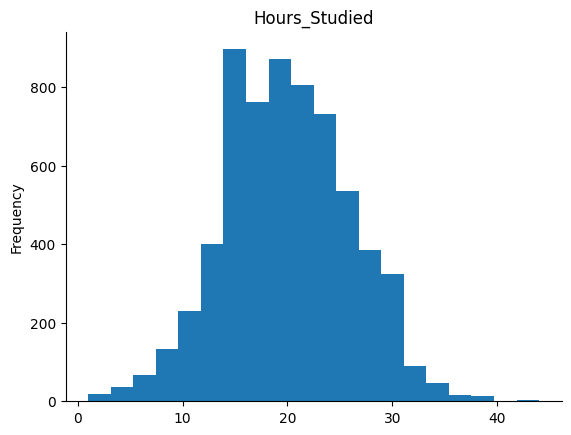

In [ ]:
# @title Hours_Studied

from matplotlib import pyplot as plt
df['Hours_Studied'].plot(kind='hist', bins=20, title='Hours_Studied')
plt.gca().spines[['top', 'right',]].set_visible(False)

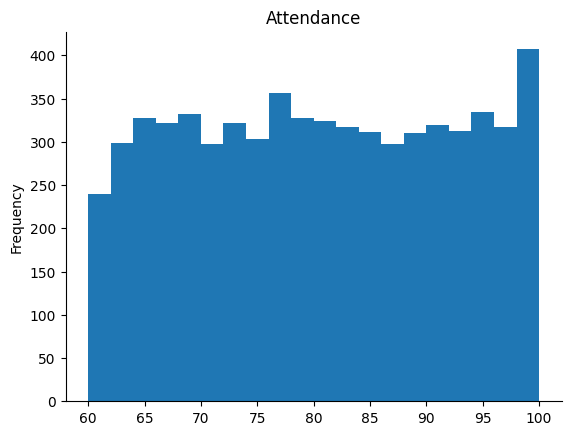

In [ ]:
# @title Attendance

from matplotlib import pyplot as plt
df['Attendance'].plot(kind='hist', bins=20, title='Attendance')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Atencion de los padres

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Parental_Involvement)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Involvement),2.0,2405.587354,1202.793677,80.462228,3.086485e-35
Residual,6375.0,95297.009071,14.948550,NaN,NaN


Se rechaza ho, hay relación entre variables, al menos un grupo es diferente

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.7334   0.0 -2.0626 -1.4042   True
  High Medium   -0.999   0.0 -1.2636 -0.7344   True
   Low Medium   0.7344   0.0  0.4363  1.0326   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

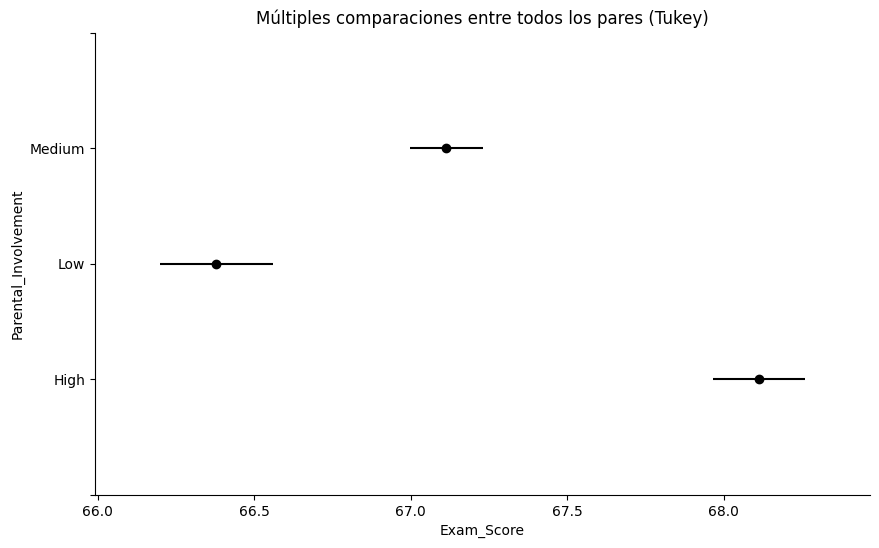

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Parental_Involvement'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Parental_Involvement", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Parental_Involvement'] = df["Parental_Involvement"].map({"Low":0, "Medium":1, "High":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Acceso a recursos

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Access_to_Resources)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Access_to_Resources),2.0,2752.911147,1376.455574,92.41636,2.722170e-40
Residual,6375.0,94949.685278,14.894068,NaN,NaN


Se rechaza ho, hay relación entre variables, al menos un grupo es distinto

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.8795   0.0 -2.2071 -1.5518   True
  High Medium  -0.9468   0.0 -1.2088 -0.6848   True
   Low Medium   0.9327   0.0   0.633  1.2323   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

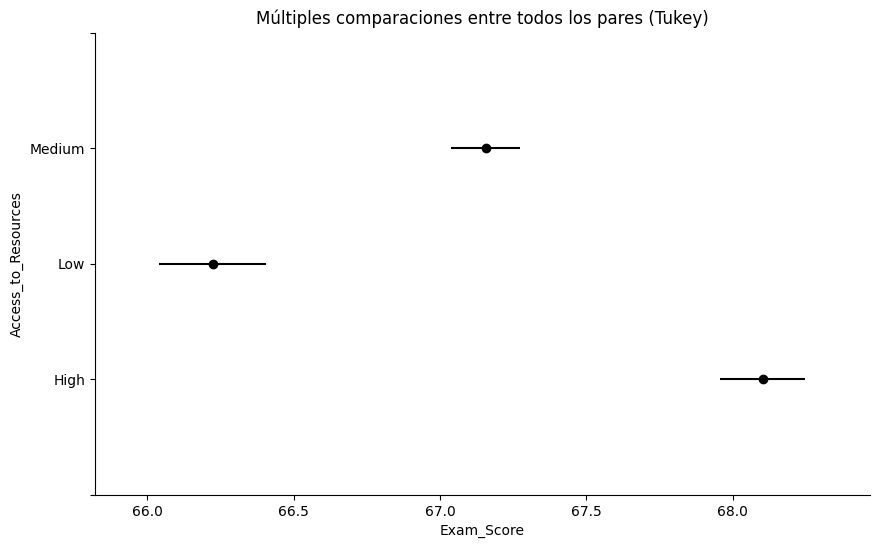

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Access_to_Resources'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Access_to_Resources", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Access_to_Resources'] = df["Access_to_Resources"].map({"Low":0, "Medium":1, "High":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Actividades extracurriculares

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Extracurricular_Activities)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Extracurricular_Activities),1.0,388.552812,388.552812,25.457916,4.646554e-07
Residual,6376.0,97314.043614,15.262554,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

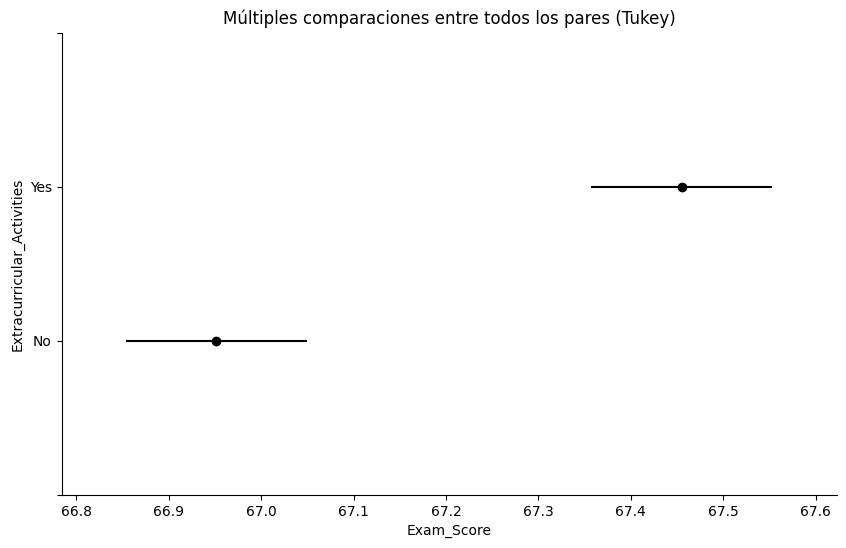

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Extracurricular_Activities'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Extracurricular_Activities", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Extracurricular_Activities'] = df["Extracurricular_Activities"].map({"No":0, "Yes":1})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Sleep_Hours

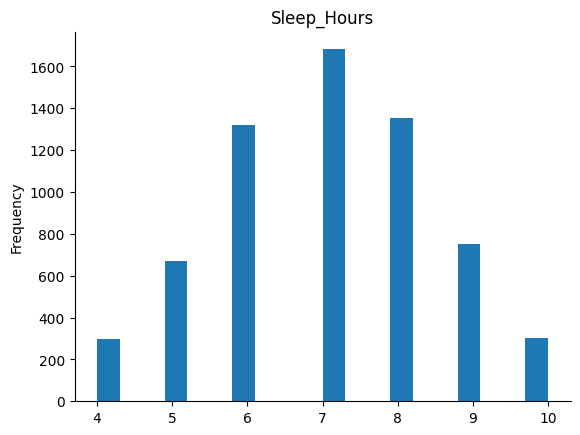

In [ ]:
from matplotlib import pyplot as plt
df['Sleep_Hours'].plot(kind='hist', bins=20, title='Sleep_Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)
#Discreta pq tiene picos

## Previous_Scores

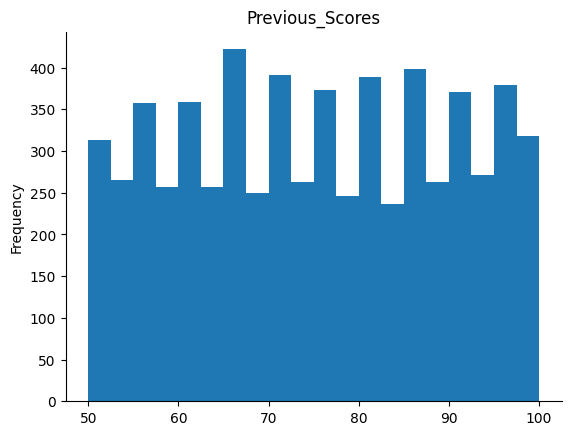

In [ ]:
from matplotlib import pyplot as plt
df['Previous_Scores'].plot(kind='hist', bins=20, title='Previous_Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Motivation_Level

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Motivation_Level)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Motivation_Level),2.0,776.488813,388.244407,25.535515,9.000204e-12
Residual,6375.0,96926.107612,15.204095,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9794    0.0 -1.3115 -0.6474   True
  High Medium   -0.405 0.0048 -0.7071  -0.103   True
   Low Medium   0.5744    0.0  0.3086  0.8402   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

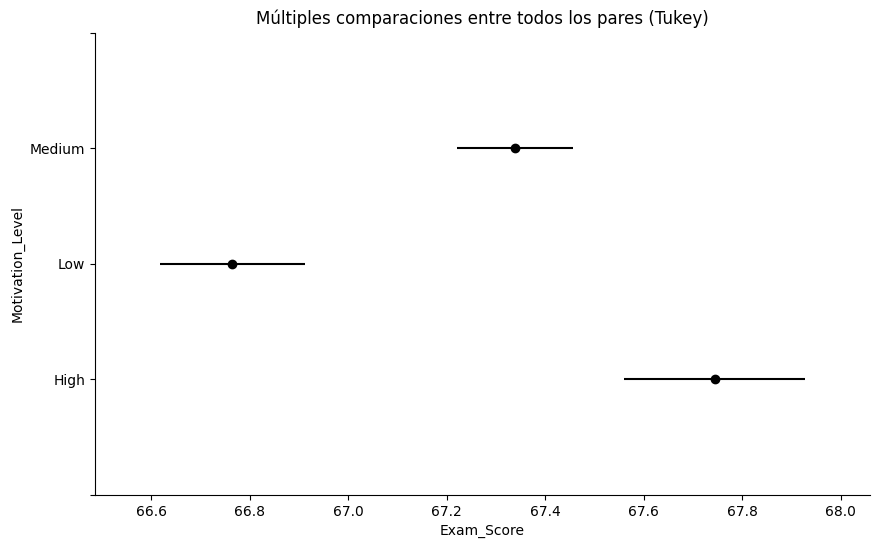

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Motivation_Level'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Motivation_Level", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Motivation_Level'] = df["Motivation_Level"].map({"Low":0, "Medium":1, "High":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,0,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,1,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,1,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,1,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,1,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,0,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,2,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Internet_Access

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Internet_Access)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Internet_Access),1.0,255.358422,255.358422,16.708173,0.000044
Residual,6376.0,97447.238003,15.283444,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

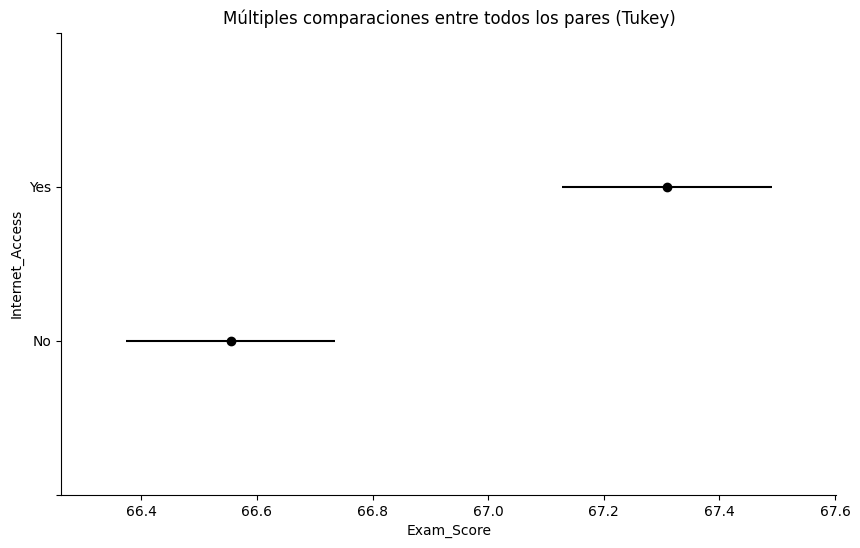

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Internet_Access'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Internet_Access", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Internet_Access'] = df["Internet_Access"].map({"No":0, "Yes":1})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,0,1,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,1,1,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,1,1,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,1,1,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,1,1,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,0,1,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,2,1,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Tutoring_Sessions

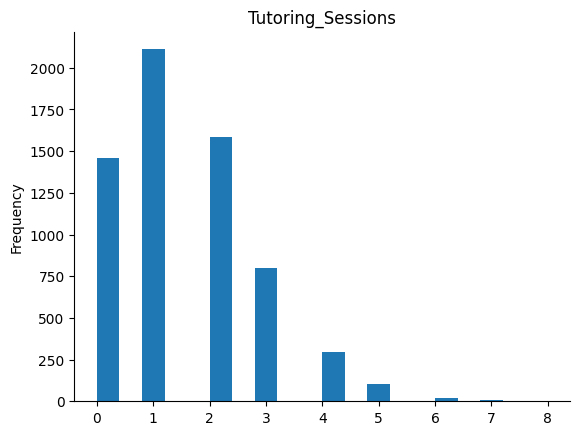

In [ ]:
from matplotlib import pyplot as plt
df['Tutoring_Sessions'].plot(kind='hist', bins=20, title='Tutoring_Sessions')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Family_Income

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Family_Income)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Family_Income),2.0,874.339934,437.169967,28.782492,3.597672e-13
Residual,6375.0,96828.256491,15.188746,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -0.9882    0.0 -1.3048 -0.6717   True
  High Medium  -0.4705 0.0015 -0.7873 -0.1536   True
   Low Medium   0.5178    0.0  0.2631  0.7725   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

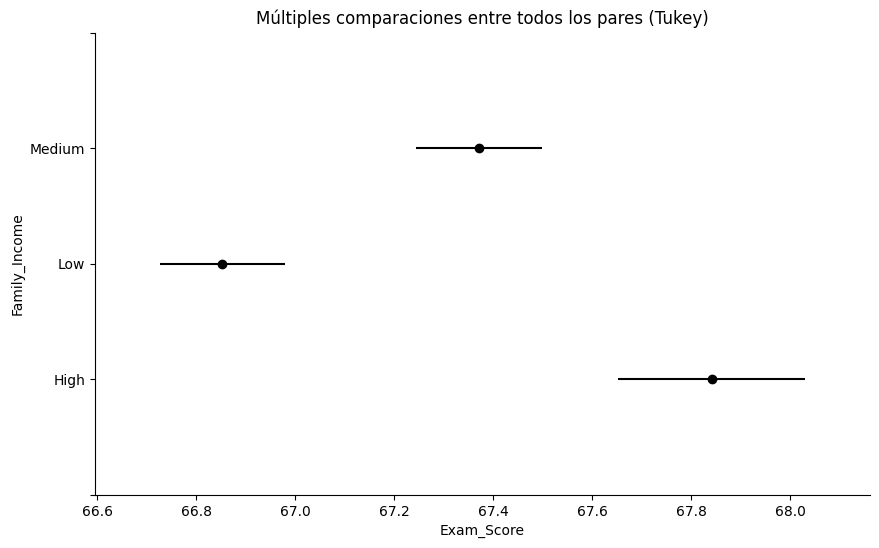

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Family_Income'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Family_Income", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Family_Income'] = df["Family_Income"].map({"Low":0, "Medium":1, "High":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,0,1,2,1,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,1,1,2,1,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,1,1,1,1,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,1,1,3,1,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,1,1,3,0,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,0,1,3,0,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,2,1,2,0,Medium,Private,Positive,3,No,High School,Far,Female,68


## Teacher_Quality

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Teacher_Quality)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Teacher_Quality),2.0,566.739816,283.369908,18.59749,8.844704e-09
Residual,6375.0,97135.856609,15.236997,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low   -0.906    0.0 -1.3224 -0.4896   True
  High Medium  -0.5632    0.0 -0.8198 -0.3066   True
   Low Medium   0.3428 0.0971 -0.0462  0.7318  False
----------------------------------------------------


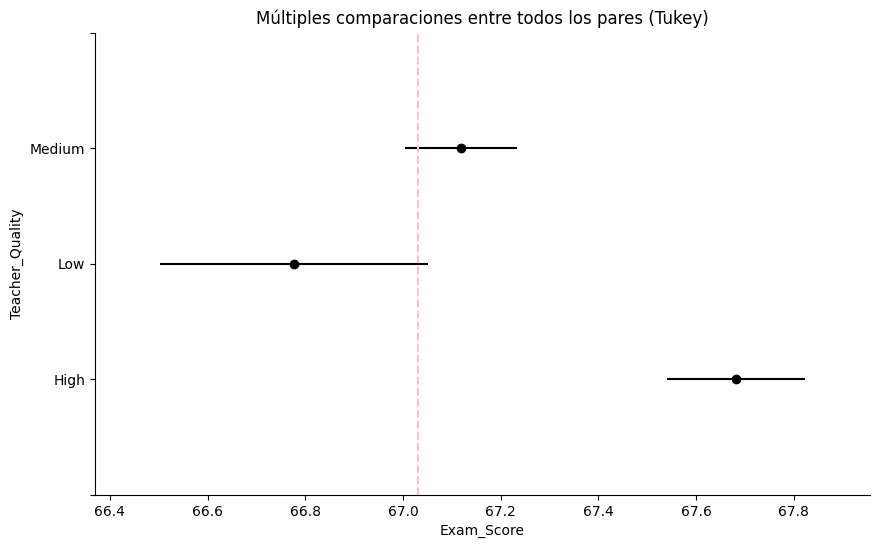

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Teacher_Quality'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Teacher_Quality", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
plt.axvline(x=67.03, color='pink', linestyle='--')

In [ ]:
df['Teacher_Quality'] = df["Teacher_Quality"].map({"Low":1, "Medium":1, "High":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,0,1,2,1,1,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,1,1,2,1,1,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,1,1,1,1,1,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,1,1,3,1,2,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,Private,Positive,3,No,High School,Far,Female,68


## School_Type

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(School_Type)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(School_Type),1.0,11.540237,11.540237,0.753196,0.385499
Residual,6376.0,97691.056188,15.321684,NaN,NaN


No se rechaza ho, no hay diferencia, grupos iguales.

In [ ]:
df = df.drop(columns=['School_Type'])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,0,1,2,1,1,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,1,1,2,1,1,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,1,1,1,1,1,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,1,1,3,1,2,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,Positive,3,No,High School,Far,Female,68


## Peer_Influence

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Peer_Influence)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Peer_Influence),2.0,976.526155,488.263077,32.180333,1.242613e-14
Residual,6375.0,96726.070271,15.172717,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
Negative  Neutral   0.6329    0.0 0.3229 0.9429   True
Negative Positive   1.0538    0.0  0.745 1.3626   True
 Neutral Positive   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

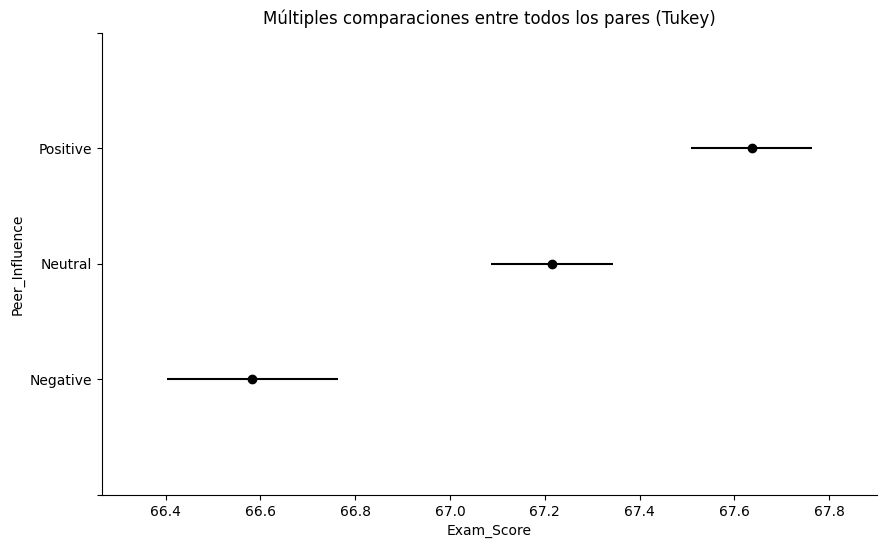

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Peer_Influence'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Peer_Influence", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Peer_Influence'] = df["Peer_Influence"].map({"Negative":1, "Neutral":1, "Positive":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,2,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,2,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,2,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,2,3,No,High School,Far,Female,68


## Physical_Activity

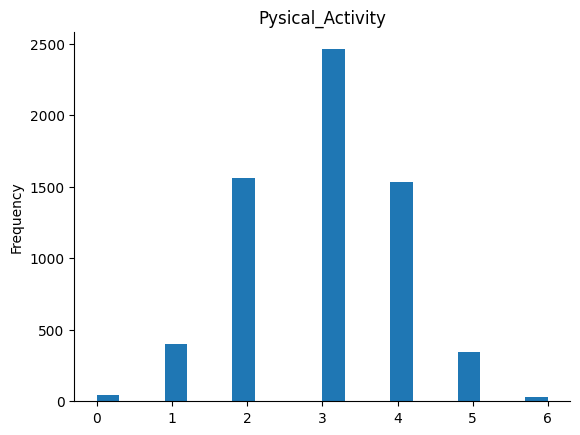

In [ ]:
from matplotlib import pyplot as plt
df['Physical_Activity'].plot(kind='hist', bins=20, title='Pysical_Activity')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Learning_Disabilities

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Learning_Disabilities)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Learning_Disabilities),1.0,687.937066,687.937066,45.212618,1.921126e-11
Residual,6376.0,97014.659360,15.215599,NaN,NaN


Se rechaza ho, por lo tanto hay diferencia en al menos un grupo.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    No    Yes  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

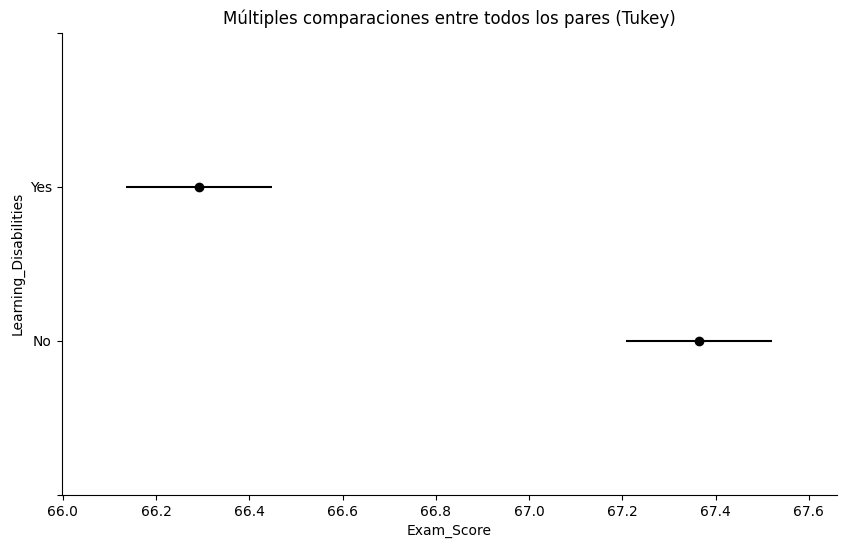

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Learning_Disabilities'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Learning_Disabilities", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Learning_Disabilities'] = df["Learning_Disabilities"].map({"No":0, "Yes":1})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,2,3,0,High School,Near,Male,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,4,0,College,Moderate,Female,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,4,0,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,4,0,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,4,0,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,2,2,0,High School,Near,Female,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,2,2,0,High School,Near,Female,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,2,0,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,2,3,0,High School,Far,Female,68


## Parental_Education_Level

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Parental_Education_Level)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Education_Level),2.0,1089.555877,544.777939,35.947108,2.990498e-16
Residual,6375.0,96613.040548,15.154987,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo.

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
    College  High School  -0.4635 0.0001 -0.7268 -0.2002   True
    College Postgraduate   0.6142    0.0  0.2856  0.9429   True
High School Postgraduate   1.0778    0.0  0.7754  1.3801   True
---------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

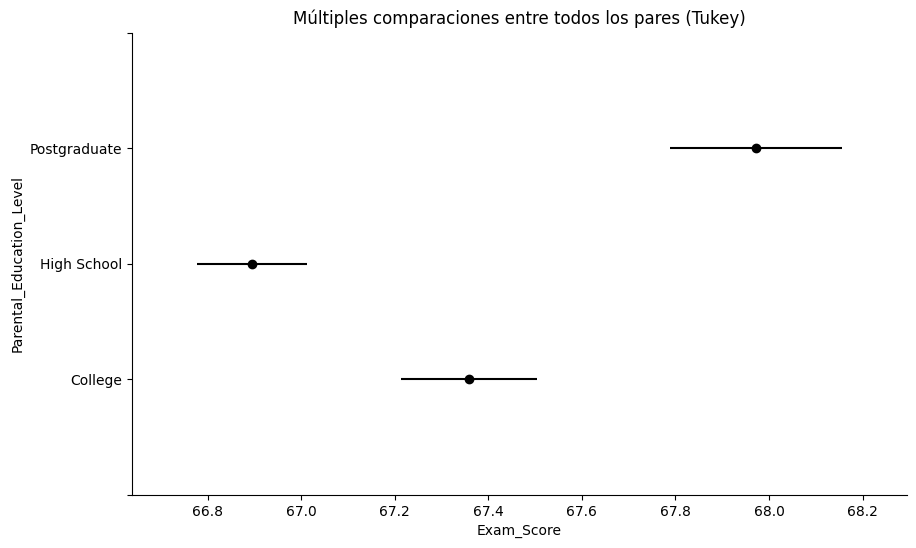

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Parental_Education_Level'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Parental_Education_Level", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Parental_Education_Level'] = df["Parental_Education_Level"].map({"College":0, "High School":1, "Postgraduate":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,2,3,0,1,Near,Male,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,4,0,0,Moderate,Female,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,4,0,2,Near,Male,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,4,0,1,Moderate,Male,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,4,0,0,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,2,2,0,1,Near,Female,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,2,2,0,1,Near,Female,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,2,0,2,Near,Female,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,2,3,0,1,Far,Female,68


## Distance_from_Home

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Distance_from_Home)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Distance_from_Home),2.0,758.421410,379.210705,24.936704,1.630308e-11
Residual,6375.0,96944.175015,15.206929,NaN,NaN


Se rechaza ho, hay diferencia en al menos un grupo

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower  upper  reject
-----------------------------------------------------
     Far Moderate   0.4882 0.017 0.0705 0.9059   True
     Far     Near   1.0154   0.0 0.6237  1.407   True
Moderate     Near   0.5272   0.0 0.2722 0.7822   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

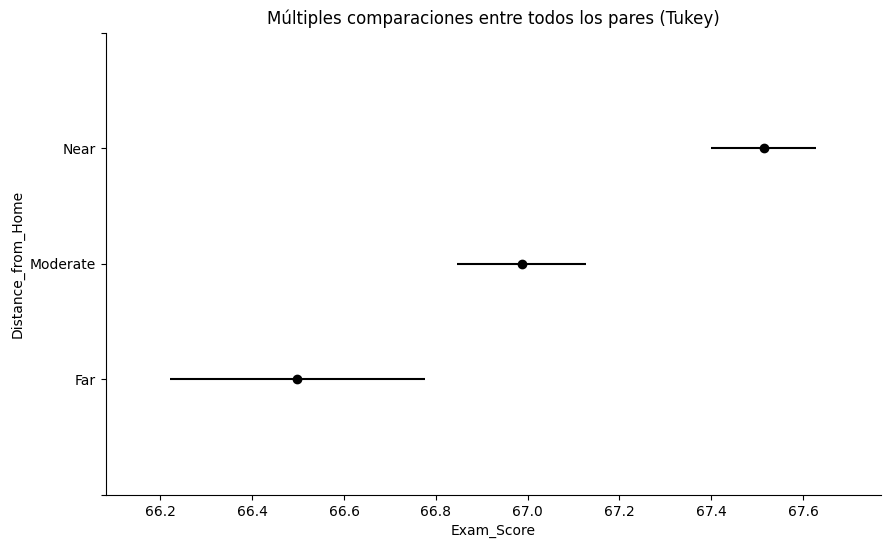

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Distance_from_Home'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Distance_from_Home", xlabel="Exam_Score")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Distance_from_Home'] = df["Distance_from_Home"].map({"Far":0, "Moderate":1, "Near":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,2,3,0,1,2,Male,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,4,0,0,1,Female,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,4,0,2,2,Male,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,4,0,1,1,Male,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,4,0,0,2,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,2,2,0,1,2,Female,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,2,2,0,1,2,Female,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,2,0,2,2,Female,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,2,3,0,1,0,Female,68


## Gender

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Exam_Score ~ C(Gender)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Ho. No hay relación entre variables, grupos iguales
#Hi. Hay relación entre variables, al menos un grupo es diferente.
#Alpha: 0.05

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.377044,2.377044,0.155128,0.693696
Residual,6376.0,97700.219381,15.323121,NaN,NaN


No se rechaza ho, no hay diferencia entre grupos

In [ ]:
df = df.drop(columns=['Gender'])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,2,3,0,1,2,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,4,0,0,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,4,0,2,2,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,4,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,4,0,0,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,2,2,0,1,2,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,2,2,0,1,2,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,2,0,2,2,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,2,3,0,1,0,68


## Exam_Score

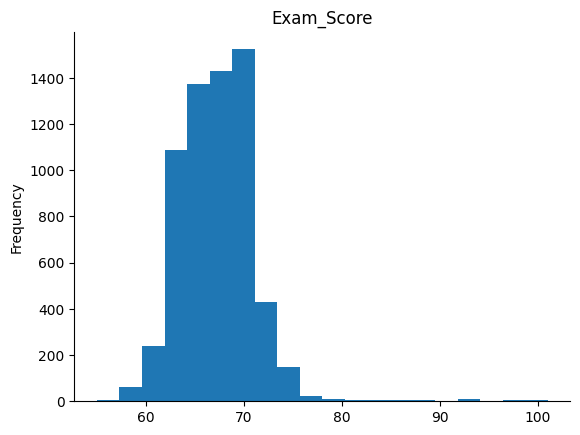

In [ ]:
from matplotlib import pyplot as plt
df['Exam_Score'].plot(kind='hist', bins=20, title='Exam_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Mi variable dependiente (Y) es Exam_Score
#	Hours_Studied: no hay datos altipicos es continua
#	Attendance: no hay datos altipicos es continua
#Parental_Involvement: si hubo diferencia significativa entre grupos
#                      Low=0 Medium=1 High=2
#	Access_to_Resources: si hubo diferencia significativa entre grupos
#                      Low=0 Medium=1 High=2
#Extracurricular_Activities: si hubo diferencia significativa entre grupos
#                            No=0 Yes=1
#Sleep_Hours: variable numerica discreta no presenta datos altipicos
#Previous_Scores: variable numerica no presenta datos altipicos
#Motivation_Level: si hubo diferencia significativa  entre grupos
#                  Low=0 Medium=1 High=2
#Internet_Access: si hubo diferencia significativa entre grupos
#                 No=0 Yes=1
#Tutoring_Sessions: si hubo diferencia significativa  entre grupos
#                   Low=0 Medium=1 High=2
#Family_Income: si hubo diferencia significativa  entre grupos
#               Low=0 Medium=1 High=2
#Teacher_Quality: Hubo diferencia significativa pero no entre todos los grupos
#                 Low=1 Medium=1 High=2
#School_Type: no hubo diferencia significativa entre grupos se elimina la columna
#Peer_Influence: si hubo diferencia significativa  entre grupos
#                Negative=0 Neutral=1 Positive=2
#Pyshical_Activity: variable numerica discreta no presenta datos altipicos
#Learning_Disabilities: si hubo diferencia significativa entre grupos
#                       No=0 Yes=1
#Parental_Education_Level: si hubo diferencia significativa entre grupos
#                          College=0, High School=1, Postgraduate=2
#Distance_from_Home: si hubo diferencia significativa entre grupos
#                    Far=0, Moderate=1, Near=2
#Gender: no hubo diferencia significativa entre grupos se elimina la columna
#Exam_Score: variable numerica continua

# Mapa de calor

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0, 0.5, 'Hours_Studied'),
  Text(0, 1.5, 'Attendance'),
  Text(0, 2.5, 'Parental_Involvement'),
  Text(0, 3.5, 'Access_to_Resources'),
  Text(0, 4.5, 'Extracurricular_Activities'),
  Text(0, 5.5, 'Sleep_Hours'),
  Text(0, 6.5, 'Previous_Scores'),
  Text(0, 7.5, 'Motivation_Level'),
  Text(0, 8.5, 'Internet_Access'),
  Text(0, 9.5, 'Tutoring_Sessions'),
  Text(0, 10.5, 'Family_Income'),
  Text(0, 11.5, 'Teacher_Quality'),
  Text(0, 12.5, 'Peer_Influence'),
  Text(0, 13.5, 'Physical_Activity'),
  Text(0, 14.5, 'Learning_Disabilities'),
  Text(0, 15.5, 'Parental_Education_Level'),
  Text(0, 16.5, 'Distance_from_Home'),
  Text(0, 17.5, 'Exam_Score')])

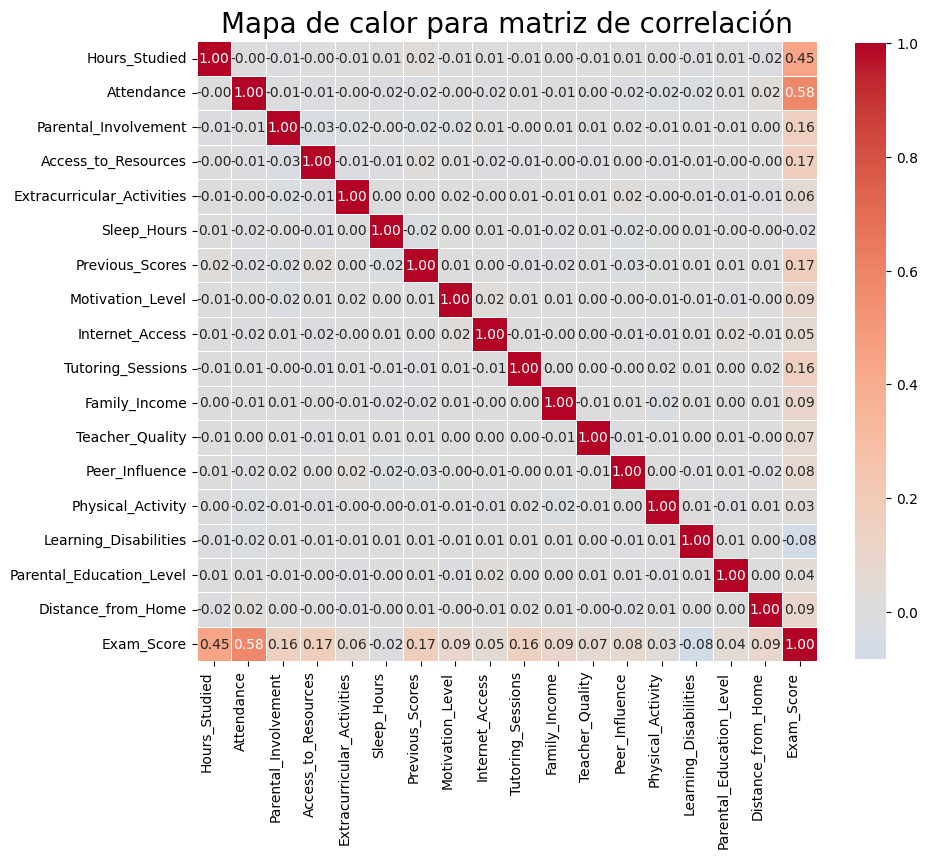

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()

plt.figure(figsize=(10,10),dpi=100)

sns.heatmap(
    matriz_de_correlacion, #lo que va a graficar
    annot=True, #se muestran los valores en las celdas
    fmt="0.2f", #0.2f significa "dos decimales"
    cmap="coolwarm", #paleta de colores
    square=True, #forzar cuadrados ya que a veces salen en rectangulos
    linewidths=0.5, #grosor de lineas
    cbar_kws={"shrink":0.8}, #tamaño barra lateral
    center=0)

plt.title("Mapa de calor para matriz de correlación", fontsize=20)
plt.xticks(rotation=90, ha= "right")
plt.yticks(rotation=0)
#el mapa de calor nos muestra las r de pearson



2 Realice un diagrama de dispersión para estos datos.




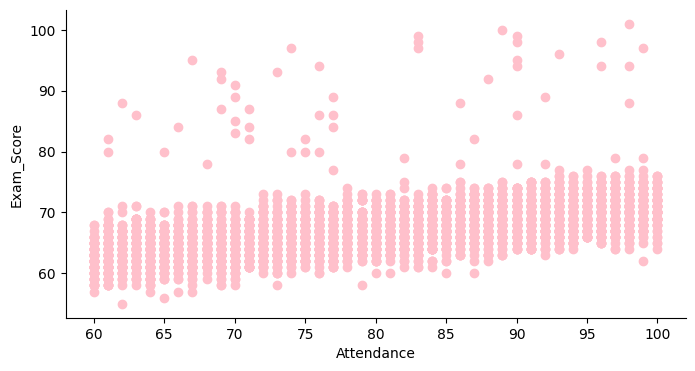

3 ¿Los datos soportan la suposición de linealidad?
Si soportan la suposición de linealidad


4 Calcule el coeficiente de correlación e interprete el resultado.
Coeficiente de correlación:  0.5803



6 Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.




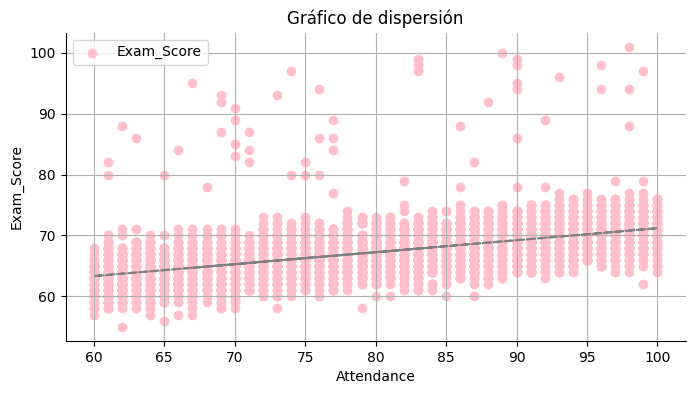

5 Calcule el coeficiente de determinación e interprete el resultado.
Coeficiente de determinación:  0.3367



7 Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ( b1 )
Intervalo de confianza para b1 de  95%
 0.1899 < b1 <  0.2034



8 Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?




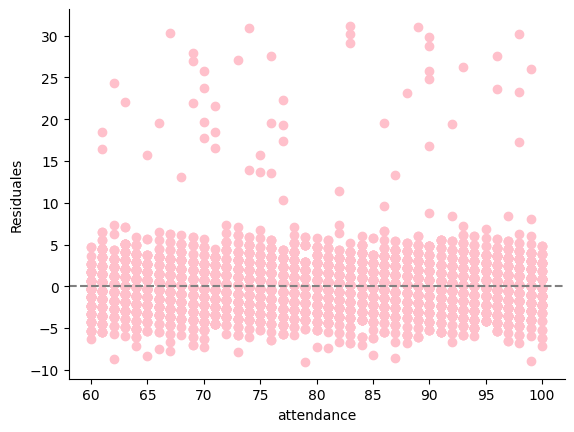

9 Realice la prueba de Shapiro para los residuales y comente el resultado.
valor-p de Shapiro:  0.0000

Se rechaza ho, por lo tanto los datos no siguen una distribucción normal


10 Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.
valor_p de Breusch-Pagan:  0.8205

No se rechaza ho, hay homoscedasticidad


11 Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados
interpolar:
para x = 68, y = [64.88841583]
para x = 82, y = [67.64128301]
extrapolar:
para x = 15, y = [54.46684723]


12 Realice una tabla ANOVA e interprete el resultado.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6378.
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,mean_sq,F,PR(>F)
Attendance,1.0,32896.461629,32896.461629,3236.54296,0.0
Residual,6376.0,64806.134796,10.164074,NaN,NaN


In [ ]:
x = df["Attendance"]
y = df["Exam_Score"]
print("\n")

print("2 Realice un diagrama de dispersión para estos datos.")
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(x, y, label = "Exam_Score", color = 'pink')
plt.xlabel('Attendance') # nombrar eje x
plt.ylabel('Exam_Score') # nombrar eje y
plt.gca().spines[["top","right"]].set_visible(False)
print("\n")
plt.show()

print("3 ¿Los datos soportan la suposición de linealidad?")
print("Si soportan la suposición de linealidad")
print("\n")
plt.show()

print("4 Calcule el coeficiente de correlación e interprete el resultado.")
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')
print("\n")
plt.show()

print("6 Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.")
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(x,y,
            label="Exam_Score",
            color="pink")
plt.title("Gráfico de dispersión")
plt.xlabel("Attendance")
plt.ylabel("Exam_Score")
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
yc = modelo.predict(x_constante)
plt.plot(x, yc, color = 'grey', linestyle = '--')
print("\n")
plt.show()

print("5 Calcule el coeficiente de determinación e interprete el resultado.")
from sklearn.metrics import r2_score
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')
print("\n")
plt.show()

print("7 Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ( b1 )")
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')
print("\n")
plt.show()

print("8 Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?")
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'pink')
plt.xlabel('attendance')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
print("\n")
plt.show()

print("9 Realice la prueba de Shapiro para los residuales y comente el resultado.")
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')
print("Se rechaza ho, por lo tanto los datos no siguen una distribucción normal")
print("\n")
plt.show()

print("10 Realice la prueba de Brausch-Pagan para los residuales y comente el resultado.")
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
print("No se rechaza ho, hay homoscedasticidad")
print("\n")
plt.show()

print("11 Utiliza la recta de regresión para interpolar dos valores y extrapolar uno. Comenta estos resultados")
print("interpolar:")
print(f'para x = 68, y = {modelo.predict([1, 68])}')
print(f'para x = 82, y = {modelo.predict([1, 82])}')
print("extrapolar:")
print(f'para x = 15, y = {modelo.predict([1, 15])}')
print("\n")
plt.show()

print("12 Realice una tabla ANOVA e interprete el resultado.")
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("Exam_Score ~ Attendance", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova



Coeficiente de determinación:  0.5374

Intervalo de confianza para b1 de  95%
 0.1917 < b1 <  0.2031

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.5031



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6378.
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,mean_sq,F,PR(>F)
Attendance,1.0,32896.461629,32896.461629,4640.118094,0.0
Hours_Studied,1.0,19610.099125,19610.099125,2766.047510,0.0
Residual,6375.0,45196.035671,7.089574,NaN,NaN


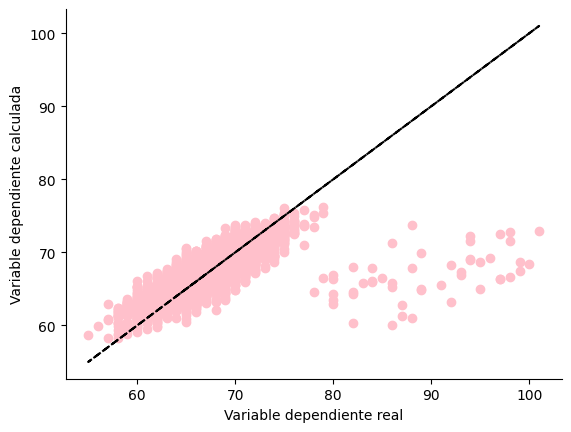

In [ ]:
x = df[["Attendance", "Hours_Studied"]]
y = df["Exam_Score"]
print("\n")

# # 2. Realice un diagrama de dispersión para estos datos.
# import matplotlib.pyplot as plt
# plt.figure(figsize = (16, 8), dpi = 100)
# plt.scatter(x, y, label = "Promedio final", color = 'red')
# plt.xlabel('Exámenes cortos') # nombrar eje x
# plt.ylabel('Promedio final') # nombrar eje y
# plt.gca().spines[["top","right"]].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
# from scipy.stats import pearsonr
# r, _ = pearsonr(x, y)
# print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'pink')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x1 = 0.5, x2 =3, x3=34, y = {modelo.predict([1, 0.5, 3, 34])}')
#print(f'para x1 = 1.5, x2 =2, x3=50, y = {modelo.predict([1, 1.5, 2, 50])}')
#print(f'para x1 = 2.5, x2 =4, x3=40, y = {modelo.predict([1, 2.0, 4, 40])}\n')
# print(f'para x = 72, y = {modelo.get_prediction([1, 0.5]).summary_frame()}')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("Exam_Score ~ Attendance + Hours_Studied", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

El modelo puede ser aplicado siempre y cuando se tenga mucha precaución ya que viola uno de los supuestos, es más recomendable usar un modelo más completo, efectivo y preciso.